In [1]:
import numpy as np
x=np.array([[1,2,3],[4,5,6]])
print('This is a numpy array:\n{}'.format(x))

This is a numpy array:
[[1 2 3]
 [4 5 6]]


In [2]:
from scipy import sparse

#Create a 2d NumPy array with a diagonal of one, with zeros everywhere else.
eye = np.eye(5)
print("NumPy array:\n",eye)

NumPy array:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [3]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored

sparse_matrix = sparse.csr_matrix(eye)
print("SciPy sparse CSR matrix:\n",sparse_matrix)

SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0


In [4]:
# Usually it is not possible to create dense representations of sparse data, so we need to create sparse representations directly.
# This will create the same sparse matrix as before, using the COO (coordinate list) format:

data = np.ones(5)
row_indices = np.arange(5)
col_indices = np.arange(5)
eye_coo = sparse.coo_matrix((data, (row_indices,col_indices)))
print("COO representation:\n",eye_coo)

#More details on SciPy sparse matrices can be found here: (http://www.scipy-lectures.org/)

COO representation:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0


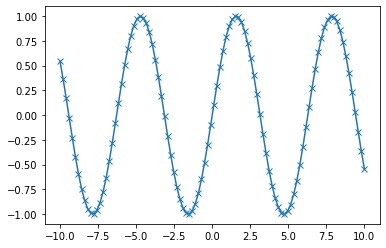

In [5]:
%matplotlib inline
# You can also use %matplotlib notebook for an interactive plot

import matplotlib.pyplot as plt

# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10,10,100)
# Create a second array using sine
y = np.sin(x)
#The plot function makes a line chart of one array against another
plt.plot(x,y,marker='x')

In [6]:
import pandas as pd

#Create a simple dataset of people
data = {'Name': ['John','Anna','Peter','Linda'],'Location':['New York','Paris','Berlin','London'],'Age':[24,13,53,33]}

data_pandas = pd.DataFrame(data)
data_pandas

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [7]:
# You can query data from this dataframe as needed.  For example, let's grab anyone above the age of 30:
data_pandas[data_pandas['Age'] > 30]

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [8]:
# All of the examples in this book can be found on https://github.com/amueller/introduction_to_ml_with_python, though we will
# still be running examples through here.  Any mglearn functions are a part of the code from the writers of this book.

In [9]:
# A first application using the Iris dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print('Keys of iris_dataset:\n',iris_dataset.keys())

#The key 'DESCR' has a description of the dataset.
print(iris_dataset['DESCR'])

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal

In [10]:
# The value of the key target_names is an array of strings, containing the species of flower we want to predict.
print('Target Names:\n', iris_dataset['target_names']) 

Target Names:
 ['setosa' 'versicolor' 'virginica']


In [11]:
# The value of feature_names is a list of strings, giving the description of each feature.
print('Feature names:\n', iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
# The data itself is contained in the target and data fields.  
# Data contains the numeric measurements of sepal length and width, and petal length and width in a NumPy array.
# Lets look at the shape of the data:

print('Shape of data: ', iris_dataset['data'].shape)

# This shows that there are 4 measurements for 150 different flowers

Shape of data:  (150, 4)


In [13]:
# The target array contains the species of each flower that was measured in a NumPy array.
# It is a one-dimensional array, with one entry per flower

print('Shape of target:',iris_dataset['target'].shape)

Shape of target: (150,)


In [14]:
# The species are encoded as integers from 0-2: (value correlations obtained from iris['target_names'])
# 0 - setosa
# 1 - versicolor
# 2 - virginica

print('Target:\n',iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
# This will split the data into seperate dataframes, one for the training data, and one for the test data.
# The training data will hold 75% of the (randomized) rows from the dataset, while the test data will hold the remaining 25%.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

# In sci-kit learn, data is usually denoted with a capital X, while labels are denoted by a lowercase y.  This is inspired by
# the standard formulation f(x)=y

In [23]:
# X_train will hold the parameters for each flower, and y_train will hold the corresponding labels, aka the type of flower.

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_train shape:  (112, 4)
y_train shape:  (112,)


In [24]:
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_test shape:  (38, 4)
y_test shape:  (38,)


In [26]:
# A good rule of thumb is to visualize the dataset to look for any obvious similarities or abnormalities.
# We will first create a dataframe with the training data, and label the columns using the strings in iris_dataset['feature_names']

iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset['feature_names'])
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


C:\Users\turne\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\turne\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002217A031888>,
      dtype=object)

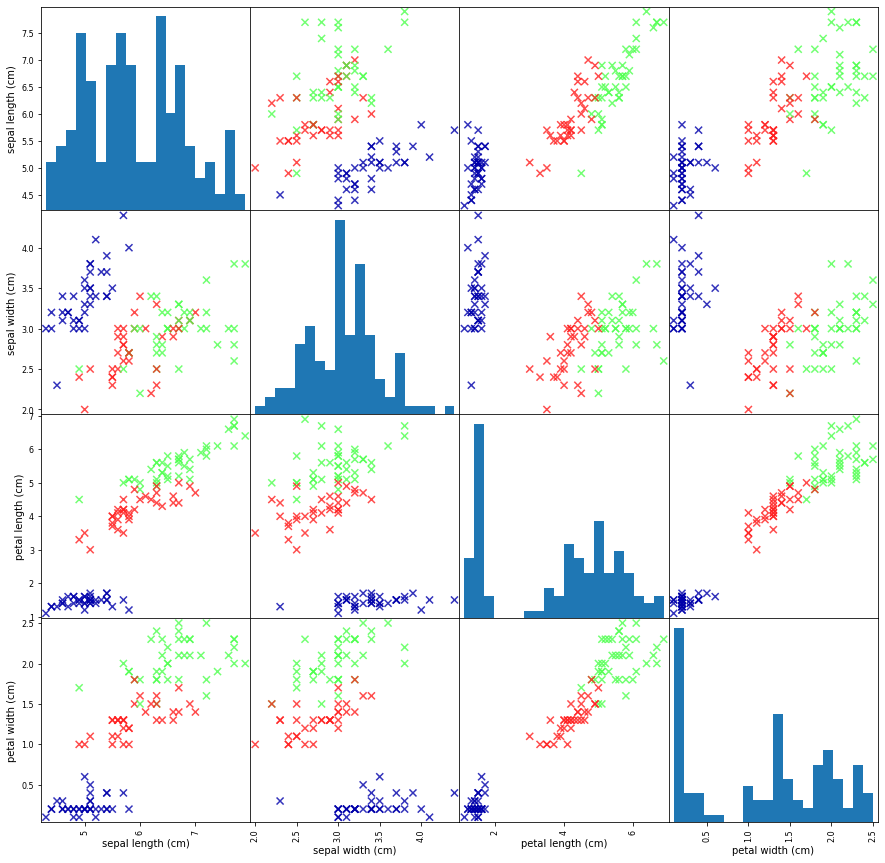

In [43]:
# Next we will create a scatter matrix (or pair plot) from the dataframe, color by y_train
import mglearn
pd.plotting.scatter_matrix(iris_dataframe, figsize=(15,15), c=y_train, marker='x', hist_kwds={'bins':20}, s=50, alpha=.8, cmap=mglearn.cm3)

# This visualization shows that the three clsses seem to be relatively well separated using the sepal and petal measurements.
# This means that a machine learning model will likely be able to learn to separate them.

In [44]:
# Here, we will use the k-nearest neighbors classifier to train our data. This model, ot make a prediction for a new data 
# point, finds the point in the training set that is closest to the new point.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# The knn object encapsulaes the algorithm that will be used to build the model from the training data, as well as the 
# algorithm to make predictions on new data points.  It will also hold the information that the algorithm has extracted from 
# the training data.  In the case of KNeighborsClassifier, it will just store the training set.

In [48]:
# To build the model on the training set, we call the fit method of the knn object, which takes as arguments the NumPy array 
# X_train containing the training data and the NumPy array y_train of the corresponding training labels:

knn.fit(X_train, y_train)

# The fit method returns the knn object itself and modifies it in place, so we get a string representation of our classifier.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [60]:
# We can now make predictions using this model on new data for which we might not know the correct labels.
# Imagine we found an iris in the wild with a sepal length of 5cm, a sepal width of 2.9cm, a petal length of 1cm, and a 
# petal width of 0.2cm.  What species of iris would this be?

X_new = np.array([[5,2.9,1,0.2]])
# Note that scikit-learn always expects two-dimensional arrays for the data.
# To make this prediction, we will call the predict method of the knn object:

prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:", iris_dataset['target_names'][prediction])

# Our model predicts that this new iris belongs to the class 0, or the setosa species.

Prediction: [0]
Predicted target name: ['setosa']


In [69]:
# Now, we can test the accuracy of our model by using the test dataset that we created earlier.

y_pred = knn.predict(X_test)
print("Test set predictions:", y_pred)

# Let's find the precentage of our accuracy: 
print("Test set score: {}".format(np.mean(y_pred==y_test).round(2)))
# This same thing could be done using the score method (why not just stick with this?)
print("Test set score: {}".format(knn.score(X_test,y_test).round(2)))

#Later we will go over how we can improve performance, and what caveats there are in tuning a model.

Test set predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
Test set score: 0.97


In [71]:
#Summary: Here's all the code needed for the whole training and evaluation procedure:

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("Test set score: {}".format(knn.score(X_test,y_test).round(2)))

Test set score: 0.97
